In [1]:
from scripts.sorting_algorithms import selection_sort, recursive_selection_sort, insertion_sort, recursive_insertion_sort, merge_sort, recursive_merge_sort
import random as r
import numpy as np
from math import log2
import matplotlib.pyplot as plt
%matplotlib inline

# 1.1: Complexity of sorting
### Opdracht 1.1: Complexiteit van sorteren
## 1.1.1 Sorting, speed?
1. Given lists of lengths 1.000, 10.000, 30.000, how long does each algorithm take to sort?
2. Assuming a list contains 30.000 sorted items, how long does each algorithm take to sort?
3. Reverse the sorted list from the previous point, how long does each algorithm take to sort?

In [2]:
def give_lists():
    thirtyK  = np.arange(0, 30_000)
    tenK     = np.arange(0, 10_000)
    oneK     = np.arange(0, 1_000)
    
    np.random.shuffle(thirtyK)
    np.random.shuffle(tenK)
    np.random.shuffle(oneK)
    return thirtyK, tenK, oneK

def partial_sort_func(func):
    # TODO redo with cProfile    
    thirtyK, tenK, oneK = give_lists()
    oneK_time    = %timeit -r 1 -n 1 -o -q func(oneK)
    tenK_time    = %timeit -r 1 -n 1 -o -q func(tenK)
    thirtyK_time = %timeit -r 1 -n 1 -o -q func(thirtyK)
    
    
    return {"1.000" : oneK_time, "10.000" : tenK_time, "30.000" : thirtyK_time}

def partial_presorted_func(func):
    thirtyK = np.arange(0, 30_000)
    %timeit -r 2 -n 2 func(thirtyK)
    
def partial_reversed_func(func):
    thirtyK = np.arange(0, 30_000)[::-1]
    %timeit -r 1 -n 1 func(thirtyK)

#### Selection sort
<!-- Selection sort has a run time efficiency of $O(n^{2})$. Running 1.000.000 and 1.000.000.000 length lists is unrealistic. Here, only 1.000 will be run. -->
1. Given lists of lengths 1.000, 10.000, 30.000, how long does each algorithm take to sort?

In [3]:
selection_result = partial_sort_func(selection_sort)

In [4]:
selection_result

{'1.000': <TimeitResult : 375 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>,
 '10.000': <TimeitResult : 34 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>,
 '30.000': <TimeitResult : 5min 2s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>}

2. Assuming a list contains 30.000 sorted items, how long does each algorithm take to sort?

In [5]:
partial_presorted_func(selection_sort)

4min 57s ± 131 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


3. Reverse the sorted list from the previous point, how long does each algorithm take to sort?

In [6]:
partial_reversed_func(selection_sort)

5min 10s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Insertion sort

In [7]:
insertion_result = partial_sort_func(insertion_sort)

In [8]:
insertion_result

{'1.000': <TimeitResult : 283 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>,
 '10.000': <TimeitResult : 27.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>,
 '30.000': <TimeitResult : 4min 4s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>}

2. Assuming a list contains 30.000 sorted items, how long does each algorithm take to sort?

In [9]:
partial_presorted_func(insertion_sort)

33.9 ms ± 2.67 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


3. Reverse the sorted list from the previous point, how long does each algorithm take to sort?

In [10]:
partial_reversed_func(insertion_sort)

8min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Merge sort

In [11]:
merge_result = partial_sort_func(merge_sort)

In [12]:
merge_result

{'1.000': <TimeitResult : 21.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>,
 '10.000': <TimeitResult : 268 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>,
 '30.000': <TimeitResult : 1.17 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>}

2. Assuming a list contains 30.000 sorted items, how long does each algorithm take to sort?

In [13]:
partial_presorted_func(merge_sort)

218 ms ± 14.6 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


3. Reverse the sorted list from the previous point, how long does each algorithm take to sort?

In [14]:
partial_reversed_func(merge_sort)

807 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## 1.1.2 Big O: Best case, worst case, and average case
Decide on what type of theoretical time complexity (Big O) each algorithm has. Specifically note the 'best-case', 'worst-case', and 'average-case' for these. 

See below for some standard Big O notations in lambda form.

In [15]:
O_n2 = lambda n : n**2
O_n = lambda n : n
n_log_star_n = lambda n : n * log2(n)

x_range = list(range(1, 1000))
O_n2_list = list(map(O_n2, x_range))
O_n_list = list(map(O_n, x_range))
n_log_star_n_list = list(map(n_log_star_n, x_range))

### Selection sort
Selection sort has a Big O notation of $O(n^{2})$. Selection sort implements a double for-loop (one for-loop inside another). This usually implies $O(n^{2})$. Selection sort only fully loops through the list once (in the first for-loop). The second for-loop only loops from the index of the next-to-be-ordered item. Technically, the time complexity is $O(\dfrac{1}{2}(n^{2}-n))$.

For smaller lists this does not impact time complexity significantly enough to be noted. Selection sort has consistent behaviour in any scenario; the order of the itemsn in the original list does not impact time complexity. Best-, worst- and average-case are all equal to $O(n^{2})$. In order to illustrate the difference of the more detailed time complexity, see the accompanying plot. 

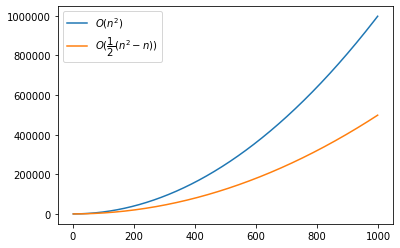

In [16]:
select_detail = lambda n : 0.5 * (n**2 - n)
select_y = list(map(select_detail, x_range))
plt.plot(x_range, O_n2_list, label="$O(n^{2})$")
plt.plot(x_range, select_y, label="$O(\dfrac{1}{2}(n^{2}-n))$")
plt.legend()
plt.show()

### Insertion sort
Insertion sort again implements a loop in a loop. In this implementation, that is a while-loop inside of a for-loop. This, again, implies a time complexity of $O(n^{2})$. Insertion sort loops through all but the first value (just like selection sort). For each item, it moves it as far to the "top" of the list as it can. This happens step-by-step, comparing the current item to the item above itself in the list. If the item above it is "greater", the current item shifts into a position above said item. 

If the list was already ordered before the algorithm is used, insertion sort simply loops through the list once. This implies a time complexity of $O(n)$. This is the best-case scenario. 

It is highly unlikely for, especially bigger lists, to be somewhat pre-ordered. In non-ideal scenarios insertion sort has to loop through most if not the entire list for every single item. Thus, the average and worst-case scenarios are both $O(n^{2})$

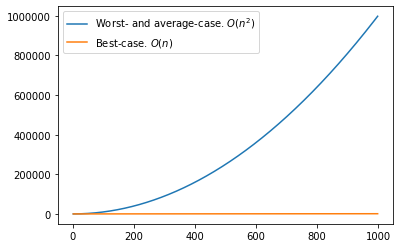

In [17]:
plt.plot(x_range, O_n2_list, label="Worst- and average-case. $O(n^{2})$")
plt.plot(x_range, O_n_list, label="Best-case. $O(n)$")
plt.legend()
plt.show()

### Merge sort
Merge sort differs quite a lot from insertion and selection sort. Unlike the latter, merge sort does not loop through the list a couple of times. Instead, it divides the list into $n$ smaller lists. It then repeatedly merges these sublists into new, ordered, sublists until only one sublist remains. The final sublist is the sorted list.

In all honesty, I did not understand this algorithm from looking at the given code. My source for these findings is [the Wikipedia about merge sort](https://en.wikipedia.org/wiki/Merge_sort).

According to this article, every single case shares the following time complexity: $O(n \log n)$. The runtime analysis done in the previous exercise implies something different. This may, however, be due to the implementation. 

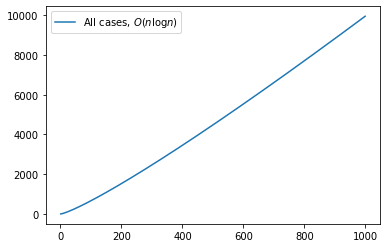

In [18]:
plt.plot(x_range, n_log_star_n_list, label="All cases, $O(n \log n)$")
plt.legend()
plt.show()

## 1.1.3 Big O: iteration vs. recursion
There is no difference in runtime complexity between iteration and recursion. Recursion is generally preffered by mathmaticians, as it is easier to express mathmatically. Iteration tends to be preffered by computer engineers, as recursion tends to use a lot of memory, leading to possible stack overflows.